In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [14]:
results = pd.read_csv("result.txt")

In [15]:
results["errorOuterApprox_avg"] = results["errorOuterApprox"] / (results["matrixDimension"]*results["matrixDimension"])

In [16]:
results.head()

,matrixDimension,timeInnerExact,errorInnerExact,timeOuterExact,errorOuterExact,timeOuterApprox,errorOuterApprox,subsample,subsampling,errorOuterApprox_avg
0,1,0.003,0.0,0.002,0.0,0.069,0.000000,0.4,2,0.000000
1,2,0.001,0.0,0.002,0.0,0.030,0.719748,0.4,2,0.179937
2,3,0.002,0.0,0.002,0.0,0.028,1.181804,0.4,2,0.131312
3,4,0.003,0.0,0.003,0.0,0.031,3.049128,0.4,2,0.190571
4,5,0.003,0.0,0.003,0.0,0.027,3.230144,0.4,2,0.129206


In [17]:
subsample = results.loc[2]["subsample"]
if (results.loc[2]["subsampling"] == 1):
    distribution = "Uniform"
else:
    distribution = "Custom"

In [18]:
# just to be save
results = results.drop(results["errorOuterApprox_avg"] > 10000, axis=0)

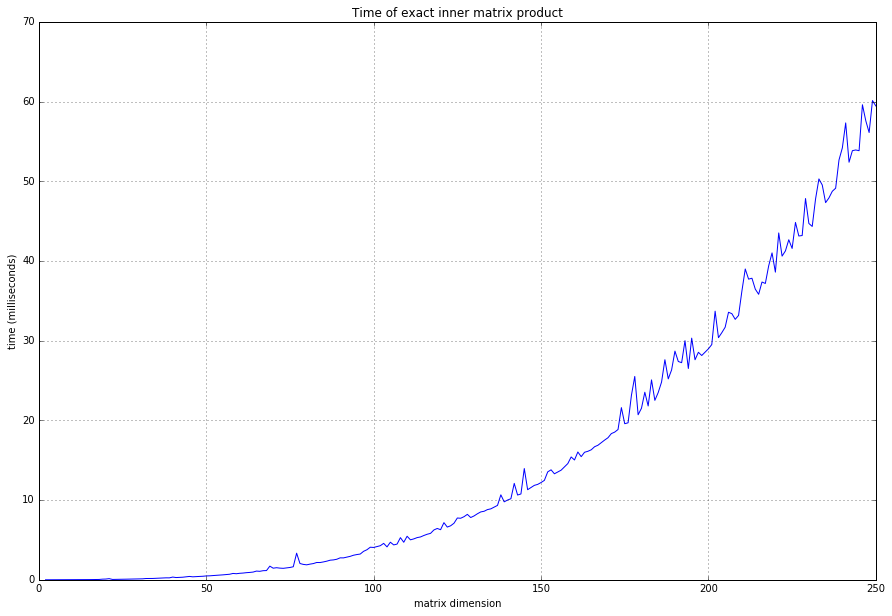

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeInnerExact"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of exact inner matrix product')
ax.grid()
fig.savefig("./images/time_exact_inner_product_" + distribution + ".png")
plt.show()

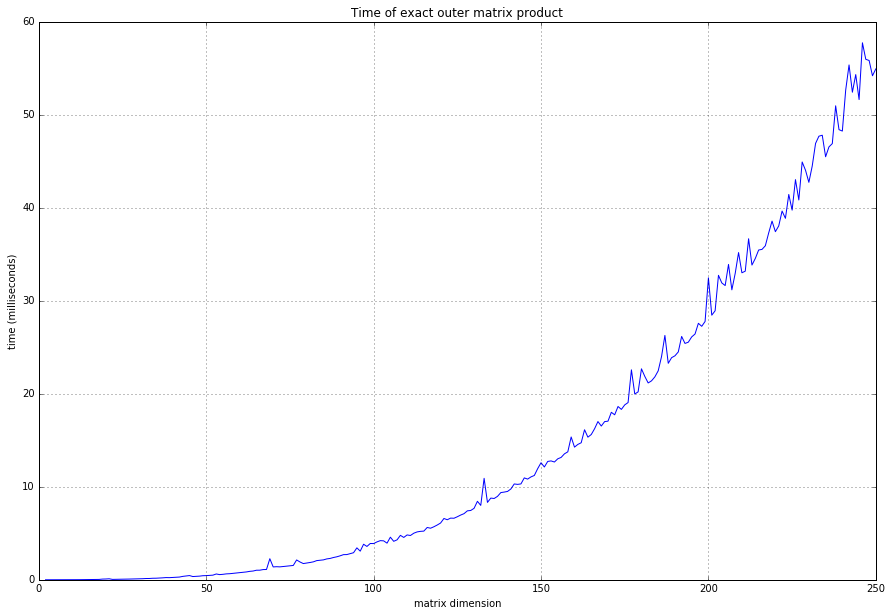

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeOuterExact"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of exact outer matrix product')
ax.grid()
fig.savefig("./images/time_exact_outer_product_" + distribution + ".png")
plt.show()

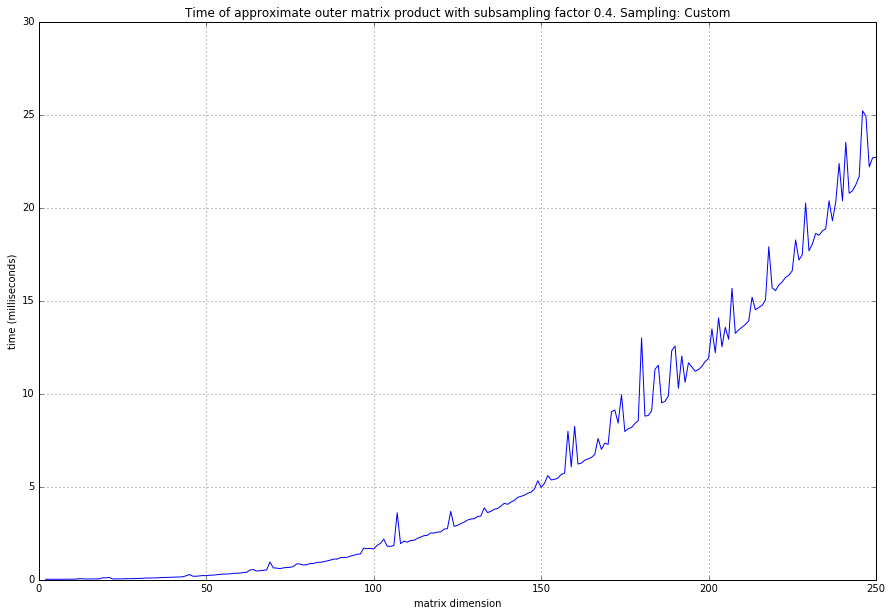

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["timeOuterApprox"])
ax.set(xlabel='matrix dimension', ylabel='time (milliseconds)', title='Time of approximate outer matrix product with subsampling factor ' + str(subsample) +  ". Sampling: " + distribution)
ax.grid()
fig.savefig("./images/time_approx_outer_product_" + distribution + ".png")
plt.show()

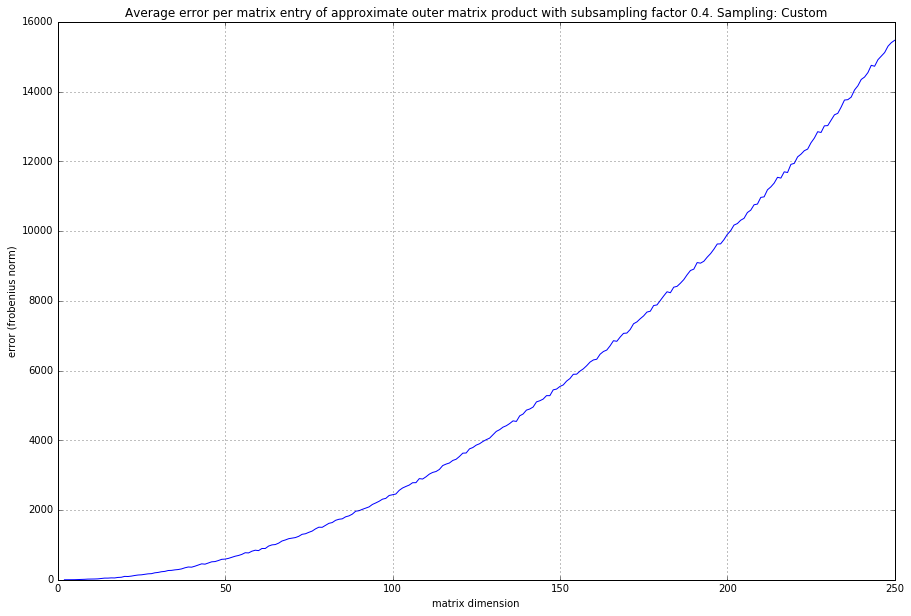

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(results["matrixDimension"], results["errorOuterApprox"])
ax.set(xlabel='matrix dimension', ylabel='error (frobenius norm)', title='Average error per matrix entry of approximate outer matrix product with subsampling factor ' + str(subsample) +  ". Sampling: " + distribution)
ax.grid()
fig.savefig("./images/error_approx_outer_product_" + distribution + ".png")
plt.show()

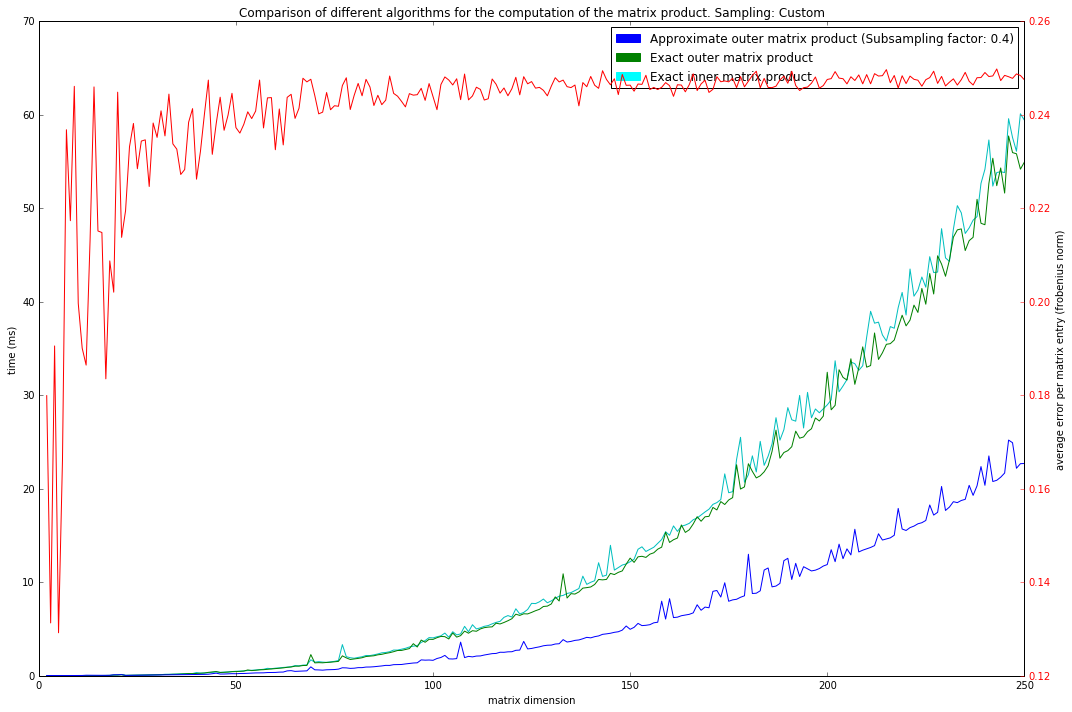

In [23]:
blue_patch = mpatches.Patch(color='blue', label='Approximate outer matrix product (Subsampling factor: ' + str(subsample) + ")")
green_patch = mpatches.Patch(color='green', label='Exact outer matrix product')
cyan_patch = mpatches.Patch(color='cyan', label='Exact inner matrix product')


fig, ax1 = plt.subplots(figsize=(15,10))
plt.legend(handles=[blue_patch, green_patch, cyan_patch])

ax1.plot(results["matrixDimension"], results["timeInnerExact"], 'c')
ax1.plot(results["matrixDimension"], results["timeOuterExact"], 'g')
ax1.plot(results["matrixDimension"], results["timeOuterApprox"], 'b')
ax1.set_xlabel('matrix dimension')
ax1.set_ylabel('time (ms)')
ax1.set(title="Comparison of different algorithms for the computation of the matrix product. Sampling: " + distribution)

ax2 = ax1.twinx()
ax2.plot(results["matrixDimension"], results["errorOuterApprox_avg"], 'r-')
ax2.set_ylabel('average error per matrix entry (frobenius norm)')
ax2.tick_params('y', colors='r')

fig.tight_layout()
fig.savefig("./images/all_avg_" + distribution + ".png")

plt.show()

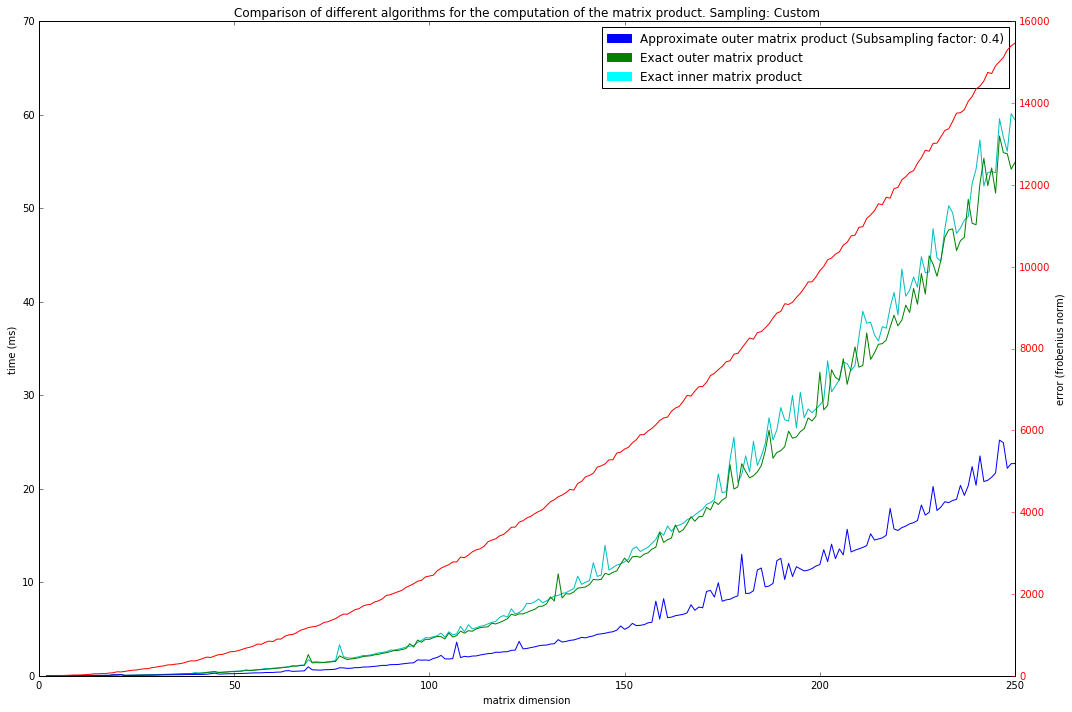

In [24]:
blue_patch = mpatches.Patch(color='blue', label='Approximate outer matrix product (Subsampling factor: ' + str(subsample) + ")")
green_patch = mpatches.Patch(color='green', label='Exact outer matrix product')
cyan_patch = mpatches.Patch(color='cyan', label='Exact inner matrix product')


fig, ax1 = plt.subplots(figsize=(15,10))
plt.legend(handles=[blue_patch, green_patch, cyan_patch])

ax1.plot(results["matrixDimension"], results["timeInnerExact"], 'c')
ax1.plot(results["matrixDimension"], results["timeOuterExact"], 'g')
ax1.plot(results["matrixDimension"], results["timeOuterApprox"], 'b')
ax1.set_xlabel('matrix dimension')
ax1.set_ylabel('time (ms)')
ax1.set(title="Comparison of different algorithms for the computation of the matrix product. Sampling: " + distribution)

ax2 = ax1.twinx()
ax2.plot(results["matrixDimension"], results["errorOuterApprox"], 'r-')
ax2.set_ylabel('error (frobenius norm)')
ax2.tick_params('y', colors='r')

fig.tight_layout()
fig.savefig("./images/all_" + distribution + ".png")

plt.show()